## importingLibraries

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

## Test set Image Processing

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 2239 files belonging to 9 classes.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_model.keras')

## Visualising and Performing Prediction on Single image

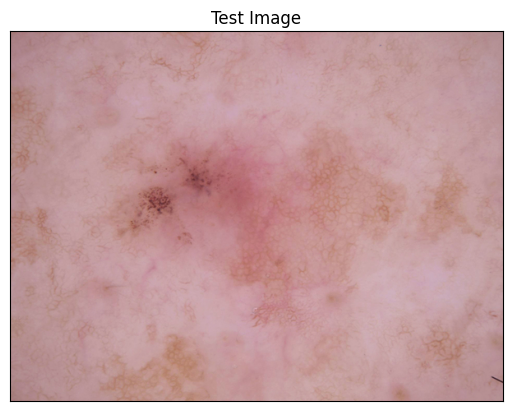

In [4]:
import cv2
import matplotlib.pyplot as plt

image_path = 'Test/nevus/ISIC_0000009.jpg'

# Read the image
img = cv2.imread(image_path)

# Check if the image was loaded
if img is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img)
    plt.title('Test Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()


## Testing model

In [5]:

# Load and preprocess the image
image = tf.keras.utils.load_img(image_path, target_size=(128, 128))  # ✅ Corrected function
input_arr = tf.keras.utils.img_to_array(image)  # ✅ Corrected function
input_arr = np.expand_dims(input_arr, axis=0)  # ✅ Ensures correct batch format

# Print shape
print(input_arr.shape)  # Should be (1, 128, 128, 3)


(1, 128, 128, 3)


In [6]:
prediction = cnn.predict(input_arr)  # ✅ Corrected `.predict()`
print(prediction.shape,prediction)  # ✅ Check the output shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
(1, 9) [[0.04040206 0.67720026 0.04443636 0.01981057 0.02445326 0.04523519
  0.006303   0.10815717 0.03400214]]


In [7]:
result_index = np.argmax(prediction)
result_index

1

In [8]:
class_name = ['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

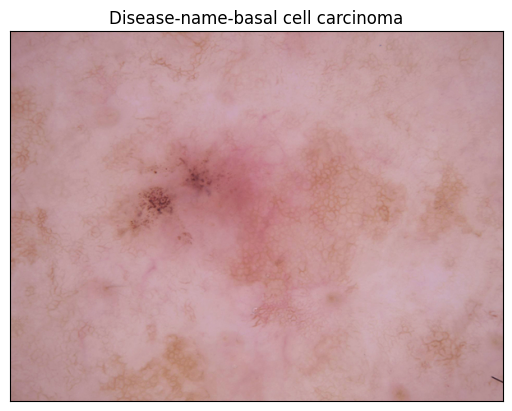

In [9]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f'Disease-name-{model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()

In [10]:
model_prediction

'basal cell carcinoma'